In [2]:
# 1. What is Simple Linear Regression?
"""
Simple linear regression is a statistical method for modeling the relationship between two continuous 
variables: one independent variable (X) and one dependent variable(Y).
"""

'\nSimple linear regression is a statistical method for modeling the relationship between two continuous \nvariables: one independent variable (X) and one dependent variable(Y).\n'

In [ ]:
# 2. What are the key assumptions of Simple Linear Regression?
"""
The key assumptions of Simple Linear Regression : 
    Linearity: 𝑋 and 𝑌 have a straight-line relationship.
    Independence: Each data point doesn’t affect the others.
    Normality of errors: The leftover errors are normally distributed.
    No endogeneity: The predictor isn’t related to the mistakes in prediction.
"""

In [3]:
# 3. What is heteroscedasticity, and why is it important to address in regression models?
"""
Heteroscedasticity is a statistical phenomenon in regression models where the variance of the residuals, or errors, 
is not constant across all levels of the independent variable(s). 
why is it important to address in regression models :
    Unreliable standard errors: Coefficients might still be unbiased, but the confidence intervals and p-values become invalid.
    Wrong inference: Hypothesis tests (like t-tests) may suggest variables are significant when they aren’t, or vice versa.
    Poor predictions: Models may give inaccurate predictions for values where variance is high.
"""


'\nHeteroscedasticity is a statistical phenomenon in regression models where the variance of the residuals, or errors, \nis not constant across all levels of the independent variable(s). \nwhy is it important to address in regression models :\n\n'

In [ ]:
# 4. What is Multiple Linear Regression?
"""
Multiple Linear Regression is a method to predict a dependent variable using two or more independent variables, assuming a linear relationship between them.
"""

In [ ]:
# 5. What is polynomial regression, and how does it differ from linear regression?
"""
Polynomial Regression is a type of regression that models the relationship between the independent variable(s) and the
dependent variable as a polynomial (curved) equation instead of a straight line.
"""


C:\Users\aditi\anaconda3\py\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\aditi\anaconda3\py\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\aditi\anaconda3\py\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


Intercept: 0.17999999999999705
Slope: 1.9800000000000006


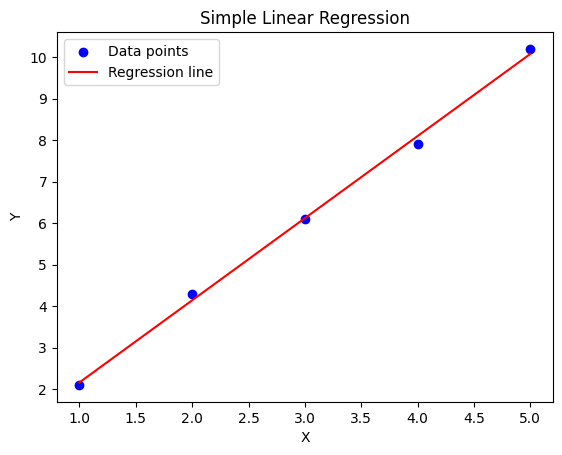

In [4]:
# 6. Implement a Python program to fit a Simple Linear Regression model to
# the following sample data:
# ● X = [1, 2, 3, 4, 5]
# ● Y = [2.1, 4.3, 6.1, 7.9, 10.2]
# Plot the regression line over the data points.
# (Include your Python code and output in the code box below.)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
Y = np.array([2.1, 4.3, 6.1, 7.9, 10.2])

model = LinearRegression()
model.fit(X, Y)

Y_pred = model.predict(X)

print(f"Intercept: {model.intercept_}")
print(f"Slope: {model.coef_[0]}")

plt.scatter(X, Y, color='blue', label='Data points')
plt.plot(X, Y_pred, color='red', label='Regression line')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Simple Linear Regression')
plt.legend()
plt.show()



In [5]:
# 7. Fit a Multiple Linear Regression model on this sample data:
# ● Area = [1200, 1500, 1800, 2000]
# ● Rooms = [2, 3, 3, 4]
# ● Price = [250000, 300000, 320000, 370000]
# Check for multicollinearity using VIF and report the results.

import pandas as pd
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

data = pd.DataFrame({
    'Area': [1200, 1500, 1800, 2000],
    'Rooms': [2, 3, 3, 4],
    'Price': [250000, 300000, 320000, 370000]
})

X = data[['Area', 'Rooms']]
y = data['Price']

model = LinearRegression()
model.fit(X, y)

print(f"Intercept: {model.intercept_}")
print(f"Coefficients: {list(zip(X.columns, model.coef_))}")

X_with_const = sm.add_constant(X)
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X_with_const.values, i+1) for i in range(len(X.columns))]

print("\nVariance Inflation Factor (VIF):")
print(vif_data)


Intercept: 103157.8947368422
Coefficients: [('Area', 63.15789473684208), ('Rooms', 34736.842105263146)]

Variance Inflation Factor (VIF):
  Feature       VIF
0    Area  7.736842
1   Rooms  7.736842


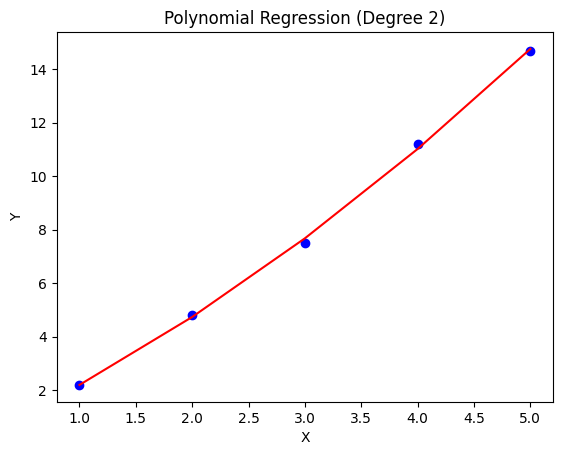

In [6]:
# 8. Implement polynomial regression on the following data:
# ● X = [1, 2, 3, 4, 5]
# ● Y = [2.2, 4.8, 7.5, 11.2, 14.7]
# Fit a 2nd-degree polynomial and plot the resulting curve.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
Y = np.array([2.2, 4.8, 7.5, 11.2, 14.7])

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, Y)

Y_pred = model.predict(X_poly)

plt.scatter(X, Y, color='blue')
plt.plot(X, Y_pred, color='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Polynomial Regression (Degree 2)')
plt.show()


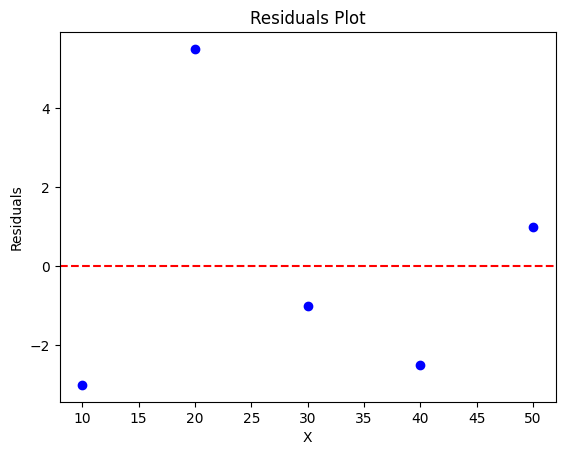

In [7]:
# 9. Create a residuals plot for a regression model trained on this data:
# ● X = [10, 20, 30, 40, 50]
# ● Y = [15, 35, 40, 50, 65]
# Assess heteroscedasticity by examining the spread of residuals.


import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

X = np.array([10, 20, 30, 40, 50]).reshape(-1, 1)
Y = np.array([15, 35, 40, 50, 65])

model = LinearRegression()
model.fit(X, Y)

Y_pred = model.predict(X)
residuals = Y - Y_pred

plt.scatter(X, residuals, color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('X')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()


In [ ]:
# 10. Imagine you are a data scientist working for a real estate company. You
# need to predict house prices using features like area, number of rooms, and location.
# However, you detect heteroscedasticity and multicollinearity in your regression
# model. Explain the steps you would take to address these issues and ensure a robust
# model.


"""
Detect heteroscedasticity using residual plots and multicollinearity using correlation matrix or VIF.

Apply log or square root transformation on house prices to stabilize variance.

Remove or combine highly correlated features to reduce multicollinearity.

Use regularization techniques like Ridge or Lasso regression to control coefficient variance.

Encode categorical variables properly and create meaningful interaction terms.

Evaluate the model using cross-validation and metrics like RMSE, and consider tree-based models if assumptions are violated.
"""